In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Load .csv file from Resources folder
covid_data = os.path.join("source_data", "owid-covid-data.csv")

# Read purchase data file and store into Pandas data frame
covid_data = pd.read_csv(covid_data, encoding="utf-8")

In [2]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [14]:
# Get data for North America only
covid_data_NA = covid_data.loc[(covid_data["continent"] == "North America")]

In [81]:
# Get data for North American countries with listed GDP per capita
covid_data_NA.dropna(subset=["gdp_per_capita"])
NA_gdp = covid_data_NA.groupby(["location"])["gdp_per_capita"].unique().astype(int).round()
NA_gdp_df = NA_gdp.to_frame().sort_values(by=["gdp_per_capita"],ascending=False)
NA_gdp_df.reset_index()

,location,gdp_per_capita
0,United States,54225
1,Bermuda,50669
2,Cayman Islands,49903
3,Canada,44017
4,Trinidad and Tobago,28763
5,Bahamas,27717
6,Saint Kitts and Nevis,24654
7,Panama,22267
8,Antigua and Barbuda,21490
9,Mexico,17336


In [99]:
covid_data_NA.dropna(subset=["people_vaccinated_per_hundred"], inplace=True)
NA_vax = covid_data_NA.groupby(["location"])["people_vaccinated_per_hundred"].max().round(2)
NA_vax_df = NA_vax.to_frame().sort_values(by=["people_vaccinated_per_hundred"],ascending=False)
NA_vax_df.reset_index()

,location,people_vaccinated_per_hundred
0,Cayman Islands,43.53
1,Bermuda,33.80
2,United States,26.12
3,Barbados,21.84
4,Dominica,18.84
5,Saint Kitts and Nevis,14.25
6,Saint Lucia,11.03
7,Canada,10.43
8,Grenada,7.65
9,Dominican Republic,7.37


In [102]:
merge_df = pd.merge(NA_gdp_df, NA_vax_df, on="location", how="inner")
merge_df.reset_index()

,location,gdp_per_capita,people_vaccinated_per_hundred
0,United States,54225,26.12
1,Bermuda,50669,33.80
2,Cayman Islands,49903,43.53
3,Canada,44017,10.43
4,Trinidad and Tobago,28763,0.07
5,Bahamas,27717,0.03
6,Saint Kitts and Nevis,24654,14.25
7,Mexico,17336,4.15
8,Barbados,16978,21.84
9,Costa Rica,15524,4.05


In [107]:
# merge_df.plot.scatter(x="gdp_per_capita", y="people_vaccinated_per_hundred")

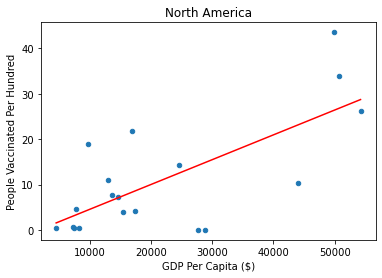

The correlation between GDP per capita and the amount of people vaccinated per hundred is 0.709764


In [108]:
x_values = merge_df["gdp_per_capita"]
y_values = merge_df["people_vaccinated_per_hundred"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, s=20)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("GDP Per Capita ($)")
plt.ylabel("People Vaccinated Per Hundred")
plt.title("North America")
plt.show()

correlation = st.pearsonr(merge_df["gdp_per_capita"], merge_df["people_vaccinated_per_hundred"])
print(f"The correlation between GDP per capita and the amount of people vaccinated per hundred is {round(correlation[0],6)}")